# sonarlight 
## Example notebook

### Load sonar data

Use own sonar log files in '.sl2' or '.sl3' format or download example data files from https://github.com/KennethTM/sonarlight/tree/main/example_files.

In [44]:
import sonarlight
from sonarlight import Sonar
import geopandas as gpd
import contextily as ctx 
import numpy as np

#Package version
print(sonarlight.__version__)

#Read data from a '.sl2' or '.sl3' file
sl3_2024_08_08__11_41_57 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-08_11.41.57.sl3') #add path to sl3 file
sl3_2024_08_09__12_21_36 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-09_12.21.36.sl3')
sl3_2024_08_09__15_02_05 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-09_15.02.05.sl3')
sl3_2024_08_09__15_02_14 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-09_15.02.14.sl3')
sl3_2024_08_09__17_38_24 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-09_17.38.24.sl3')
sl3_2024_08_11__16_03_19 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-11_16.03.19.sl3')
sl3_2024_08_11__16_03_30 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-11_16.03.30.sl3')
sl3_2024_08_12__11_31_58 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-12_11.31.58.sl3')
sl3_2024_08_12__13_27_59 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-08-12_13.27.59.sl3')
sl3_2024_09_06__12_29_21 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-09-06_12.29.21.sl3')
sl3_2024_09_08__09_03_06 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-09-08_09.03.06.sl3')
sl3_2024_09_08__14_30_49 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files_BEAR/Sonar_2024-09-08_14.30.49.sl3')

0.1.7


In [2]:
#See summary of data and available channels
#sl3

In [81]:
#View raw data store in Pandas dataframe
sl3_2024_08_08__11_41_57.df

,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames
4266,711,primary,2024-08-08 17:48:17.233999968,-16590402,8355661,-149.535481,59.928202,0.0,79.979515,0.484899,0.067529,0.680684,20.709999,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133,..."
4269,711,secondary,2024-08-08 17:48:17.233999968,-16590402,8355661,-149.535481,59.928202,0.0,79.979515,0.484899,0.067821,0.680684,20.709999,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133,..."
4272,712,primary,2024-08-08 17:48:17.253999949,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.484899,0.067821,0.680684,20.709999,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, 208,..."
4275,712,secondary,2024-08-08 17:48:17.253999949,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.484899,0.067821,0.680684,20.709999,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, 208,..."
4278,713,primary,2024-08-08 17:48:17.380000114,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.518612,0.068622,0.680683,20.709999,400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216, 216,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207810,31337,secondary,2024-08-08 22:20:23.773999929,-16589956,8356268,-149.531461,59.930943,0.0,105.704636,2.398308,0.870756,4.252694,16.119999,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207813,37933,primary,2024-08-08 22:20:23.931999922,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.885910,4.244370,16.110001,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207816,31338,secondary,2024-08-08 22:20:23.931999922,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.885910,4.244370,16.110001,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207819,37934,primary,2024-08-08 22:20:24.088000059,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.892811,4.244270,16.100000,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."


### Write to other file formats

In [4]:
#Each row contains metadata and pixel for each recorded frame. Pixels are stored in the "frames" column.
#The dataframe can be saved for further processing, for example the Parquet file format that supports nested data structues.
#sl3.df.to_parquet('sl3.parquet')

#Or to '.csv' file
#sl3.df.to_csv("sl31.csv")

#Or to '.csv' file after dropping the "frames" column containing nested arrays
# df_csv = sl3.df.copy().drop(["frames"], axis=1)
# df_csv.to_csv("sl31.csv")

### Plotting

In [5]:
import matplotlib.pyplot as plt

#### Route

/tmp/ipykernel_11846/1020536516.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  lagoon.to_file(lagoonshp)
/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'description' to 'descriptio'
  ogr_write(
/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field timestamp create as date field, though DateTime requested.
  ogr_write(
/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field begin create as date field, though DateTime requested.
  ogr_write(
/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field end create as date field, though DateTime requested.
  ogr_write(
/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/launder

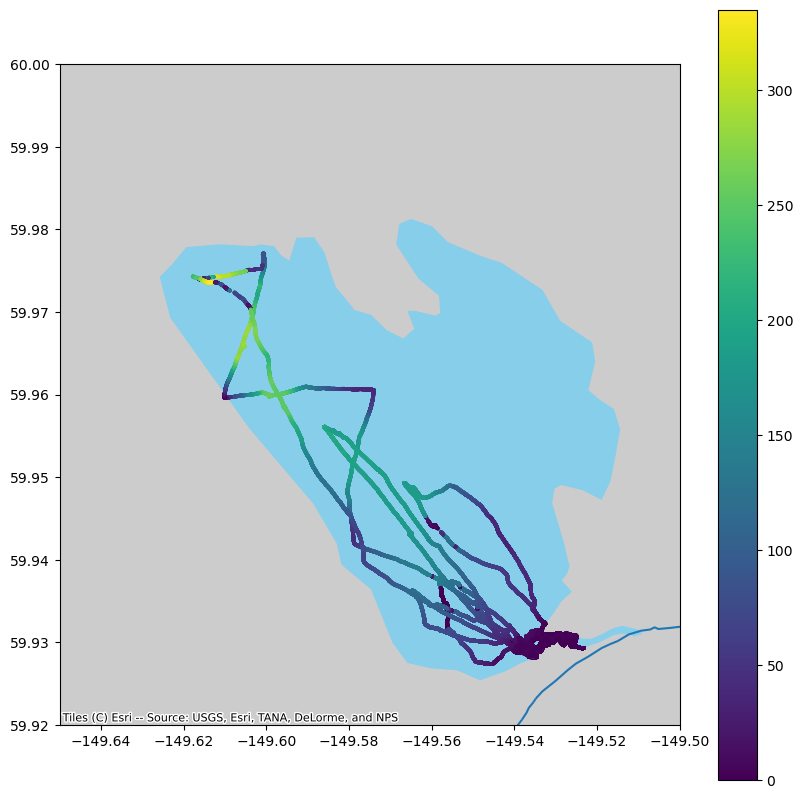

In [107]:
#Plot route and water depth (meters)

minx, miny, maxx, maxy = (-149.65, 59.92, -149.5, 60.)

AKmap_path = "/home/kayatroyer/Repositories/Sonar/sonarlight/Basemaps/417-alaska-coastline-1-63-360/ALASKA_63360_LN.shp"
AKmap = gpd.read_file(AKmap_path)
AKmap = AKmap.to_crs(epsg=4326)
kmlpath = "/home/kayatroyer/Repositories/Sonar/sonarlight/Basemaps/bearlagoon.kmz"
lagoon = gpd.read_file(kmlpath)
lagoonshp = "/home/kayatroyer/Repositories/Sonar/sonarlight/Basemaps/BearLagoon.shp"
lagoon.to_file(lagoonshp)

fig,ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
AKmap.plot(ax = ax)
lagoon.plot(ax=ax, color = 'skyblue' )
ctx.add_basemap(ax, source =ctx.providers.Esri.WorldTerrain)



ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

route_sl3_2024_08_08__11_41_57 = sl3_2024_08_08__11_41_57.df.query("survey == 'primary'")
route_sl3_2024_08_09__12_21_36 = sl3_2024_08_09__12_21_36.df.query("survey == 'primary'")
route_sl3_2024_08_09__15_02_05 = sl3_2024_08_09__15_02_05.df.query("survey == 'primary'")
route_sl3_2024_08_09__15_02_14 = sl3_2024_08_09__15_02_14.df.query("survey == 'primary'")
route_sl3_2024_08_09__17_38_24 = sl3_2024_08_09__17_38_24.df.query("survey == 'primary'")
route_sl3_2024_08_11__16_03_19 = sl3_2024_08_11__16_03_19.df.query("survey == 'primary'")
route_sl3_2024_08_11__16_03_30 = sl3_2024_08_11__16_03_30.df.query("survey == 'primary'")
route_sl3_2024_08_12__11_31_58 = sl3_2024_08_12__11_31_58.df.query("survey == 'primary'")
route_sl3_2024_08_12__13_27_59 = sl3_2024_08_12__13_27_59.df.query("survey == 'primary'")
route_sl3_2024_09_06__12_29_21 = sl3_2024_09_06__12_29_21.df.query("survey == 'primary'")
route_sl3_2024_09_08__09_03_06 = sl3_2024_09_08__09_03_06.df.query("survey == 'primary'")
route_sl3_2024_09_08__14_30_49 = sl3_2024_09_08__14_30_49.df.query("survey == 'primary'")

depth_min = 0
depth_max = route_sl3_2024_08_11__16_03_30["water_depth"].max()

# datasets =[
#     route_sl3_2024_08_08__11_41_57,
#     route_sl3_2024_08_09__12_21_36,
#     route_sl3_2024_08_09__15_02_05,
#     route_sl3_2024_08_09__15_02_14,
#     route_sl3_2024_08_09__17_38_24,
#     route_sl3_2024_08_11__16_03_19,
#     route_sl3_2024_08_11__16_03_30,
#     route_sl3_2024_08_12__11_31_58,
#     route_sl3_2024_08_12__13_27_59,
#     route_sl3_2024_09_06__12_29_21,
#     route_sl3_2024_09_08__09_03_06,
#     route_sl3_2024_09_08__14_30_49
# ]

# for data in datasets:
#     plt.scatter(data["longitude"], data["latitude"]), c = data[:]



plt.scatter(route_sl3_2024_08_08__11_41_57["longitude"], route_sl3_2024_08_08__11_41_57["latitude"], c=route_sl3_2024_08_08__11_41_57["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_09__12_21_36["longitude"], route_sl3_2024_08_09__12_21_36["latitude"], c=route_sl3_2024_08_09__12_21_36["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_09__15_02_05["longitude"], route_sl3_2024_08_09__15_02_05["latitude"], c=route_sl3_2024_08_09__15_02_05["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_09__15_02_14["longitude"], route_sl3_2024_08_09__15_02_14["latitude"], c=route_sl3_2024_08_09__15_02_14["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_09__17_38_24["longitude"], route_sl3_2024_08_09__17_38_24["latitude"], c=route_sl3_2024_08_09__17_38_24["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_11__16_03_19["longitude"], route_sl3_2024_08_11__16_03_19["latitude"], c=route_sl3_2024_08_11__16_03_19["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_11__16_03_30["longitude"], route_sl3_2024_08_11__16_03_30["latitude"], c=route_sl3_2024_08_11__16_03_30["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_12__11_31_58["longitude"], route_sl3_2024_08_12__11_31_58["latitude"], c=route_sl3_2024_08_12__11_31_58["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_08_12__13_27_59["longitude"], route_sl3_2024_08_12__13_27_59["latitude"], c=route_sl3_2024_08_12__13_27_59["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_09_06__12_29_21["longitude"], route_sl3_2024_09_06__12_29_21["latitude"], c=route_sl3_2024_09_06__12_29_21["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")  #no data?
plt.scatter(route_sl3_2024_09_08__09_03_06["longitude"], route_sl3_2024_09_08__09_03_06["latitude"], c=route_sl3_2024_09_08__09_03_06["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")
plt.scatter(route_sl3_2024_09_08__14_30_49["longitude"], route_sl3_2024_09_08__14_30_49["latitude"], c=route_sl3_2024_09_08__14_30_49["water_depth"], s = 3, vmin=depth_min, vmax=depth_max, cmap="viridis")



# route = sl3.df.query("survey == 'primary'")
# plt.scatter(route["longitude"], route["latitude"], c=route["water_depth"], s = 3)
plt.colorbar()
plt.show()


/home/kayatroyer/anaconda3/envs/sonar/lib/python3.13/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 18 is not valid for the current tile provider (valid zooms: 0 - 13).
  warnings.warn(msg)


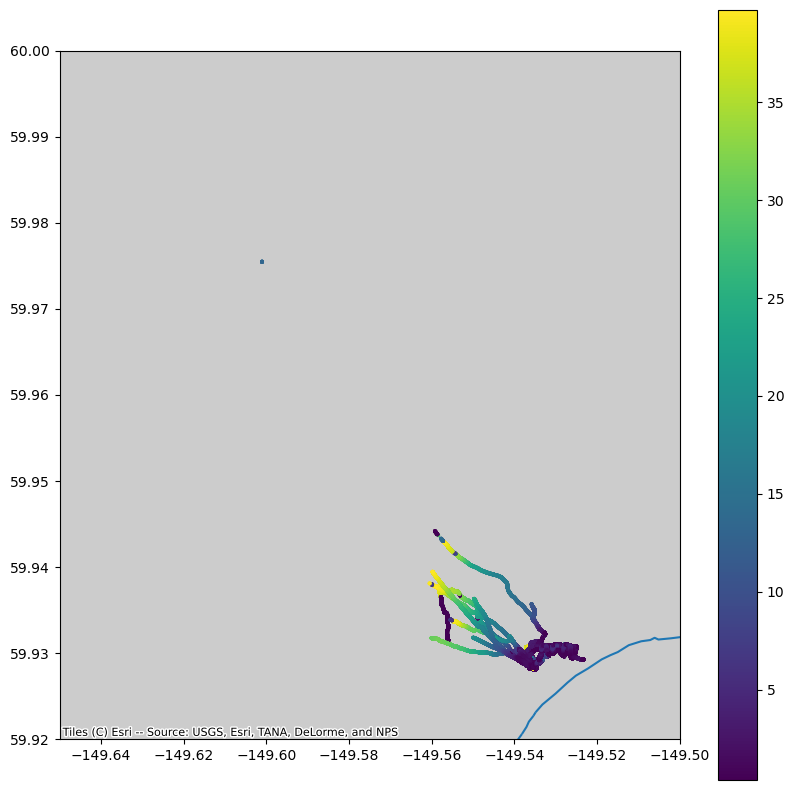

In [86]:
#Plot route and water depth (meters)

minx, miny, maxx, maxy = (-149.65, 59.92, -149.5, 60)

AKmap_path = "/home/kayatroyer/Repositories/Sonar/sonarlight/Basemaps/417-alaska-coastline-1-63-360/ALASKA_63360_LN.shp"
AKmap = gpd.read_file(AKmap_path)
AKmap = AKmap.to_crs(epsg=4326)

fig,ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
AKmap.plot(ax = ax)
ctx.add_basemap(ax, source =ctx.providers.Esri.WorldTerrain)


ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

route_sl3_2024_08_08__11_41_57 = sl3_2024_08_08__11_41_57.df.query("survey == 'secondary'")
route_sl3_2024_08_09__12_21_36 = sl3_2024_08_09__12_21_36.df.query("survey == 'secondary'")
route_sl3_2024_08_09__15_02_05 = sl3_2024_08_09__15_02_05.df.query("survey == 'secondary'")
route_sl3_2024_08_09__15_02_14 = sl3_2024_08_09__15_02_14.df.query("survey == 'secondary'")
route_sl3_2024_08_09__17_38_24 = sl3_2024_08_09__17_38_24.df.query("survey == 'secondary'")
route_sl3_2024_08_11__16_03_19 = sl3_2024_08_11__16_03_19.df.query("survey == 'secondary'")
route_sl3_2024_08_11__16_03_30 = sl3_2024_08_11__16_03_30.df.query("survey == 'secondary'")
route_sl3_2024_08_12__11_31_58 = sl3_2024_08_12__11_31_58.df.query("survey == 'secondary'")
route_sl3_2024_08_12__13_27_59 = sl3_2024_08_12__13_27_59.df.query("survey == 'secondary'")
route_sl3_2024_09_06__12_29_21 = sl3_2024_09_06__12_29_21.df.query("survey == 'secondary'")
route_sl3_2024_09_08__09_03_06 = sl3_2024_09_08__09_03_06.df.query("survey == 'secondary'")
route_sl3_2024_09_08__14_30_49 = sl3_2024_09_08__14_30_49.df.query("survey == 'secondary'")



plt.scatter(route_sl3_2024_08_08__11_41_57["longitude"], route_sl3_2024_08_08__11_41_57["latitude"], c=route_sl3_2024_08_08__11_41_57["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_09__12_21_36["longitude"], route_sl3_2024_08_09__12_21_36["latitude"], c=route_sl3_2024_08_09__12_21_36["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_09__15_02_05["longitude"], route_sl3_2024_08_09__15_02_05["latitude"], c=route_sl3_2024_08_09__15_02_05["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_09__15_02_14["longitude"], route_sl3_2024_08_09__15_02_14["latitude"], c=route_sl3_2024_08_09__15_02_14["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_09__17_38_24["longitude"], route_sl3_2024_08_09__17_38_24["latitude"], c=route_sl3_2024_08_09__17_38_24["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_11__16_03_19["longitude"], route_sl3_2024_08_11__16_03_19["latitude"], c=route_sl3_2024_08_11__16_03_19["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_11__16_03_30["longitude"], route_sl3_2024_08_11__16_03_30["latitude"], c=route_sl3_2024_08_11__16_03_30["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_12__11_31_58["longitude"], route_sl3_2024_08_12__11_31_58["latitude"], c=route_sl3_2024_08_12__11_31_58["water_depth"], s = 3)
plt.scatter(route_sl3_2024_08_12__13_27_59["longitude"], route_sl3_2024_08_12__13_27_59["latitude"], c=route_sl3_2024_08_12__13_27_59["water_depth"], s = 3)
plt.scatter(route_sl3_2024_09_06__12_29_21["longitude"], route_sl3_2024_09_06__12_29_21["latitude"], c=route_sl3_2024_09_06__12_29_21["water_depth"], s = 3)
plt.scatter(route_sl3_2024_09_08__09_03_06["longitude"], route_sl3_2024_09_08__09_03_06["latitude"], c=route_sl3_2024_09_08__09_03_06["water_depth"], s = 3)
plt.scatter(route_sl3_2024_09_08__14_30_49["longitude"], route_sl3_2024_09_08__14_30_49["latitude"], c=route_sl3_2024_09_08__14_30_49["water_depth"], s = 3)



# route = sl3.df.query("survey == 'primary'")
# plt.scatter(route["longitude"], route["latitude"], c=route["water_depth"], s = 3)
plt.colorbar()
plt.show()


In [8]:
# #Plot route with augmented coordinates
# sl3_augmented = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files/Sonar_2024-09-08_14.30.49.sl3', augment_coords=True)

# #Data frame now contained augmented x/y and longitude/latitude columns
# sl3_augmented.df

KeyboardInterrupt: 

In [27]:
#Plot sonar intensity at water depth (sediment surface)
intensity = sl3.bottom_intensity("primary")
plt.scatter(route["longitude"], route["latitude"], c=intensity, s = 3)
plt.colorbar()

IndexError: index 11903 is out of bounds for axis 0 with size 3084

In [14]:
#Coordinate augmentation smoothens the recorded coordinate which are rounded to the nearest meter.
route_augmented = sl3_augmented.df.query("survey == 'primary'")
plt.scatter(route_augmented["longitude"], route_augmented["latitude"], c="blue", s = 3, label="original")
plt.scatter(route_augmented["longitude_augmented"], route_augmented["latitude_augmented"], c="red", s = 3, label="augmented")
plt.legend(loc='upper right')

NameError: name 'sl3_augmented' is not defined

#### Raw sonar imagery

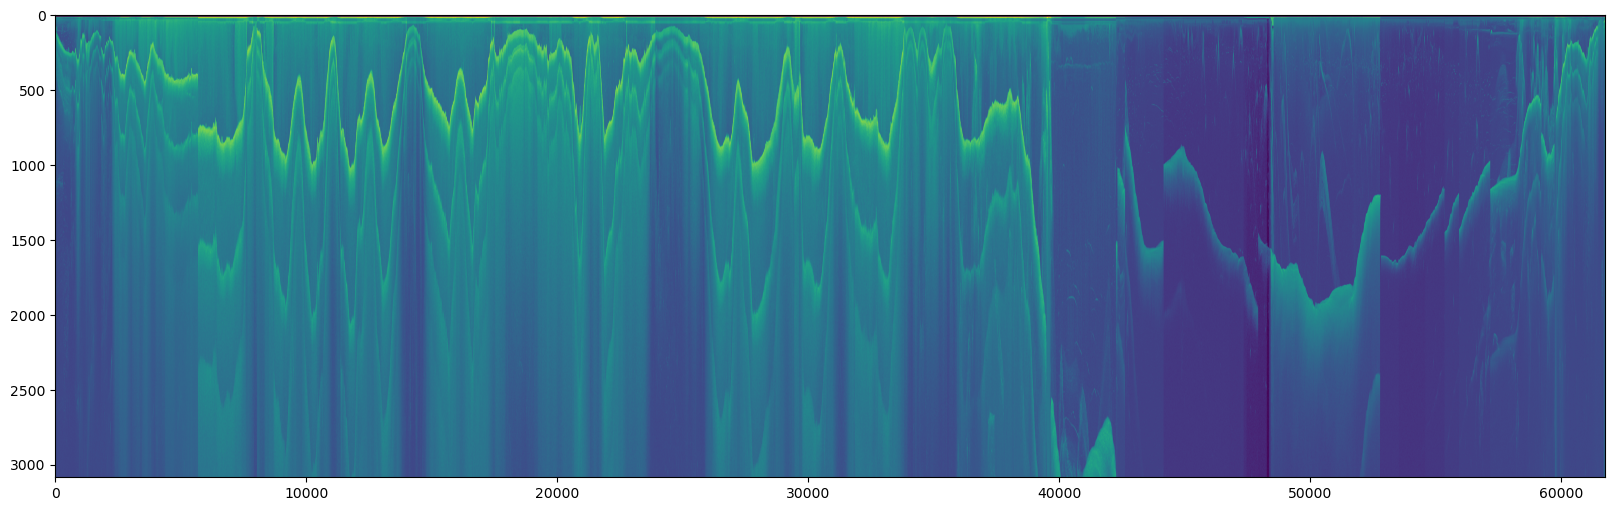

In [88]:
#Plot primary channel
plt.figure(figsize=(20,6))
prim = sl3_2024_08_12__11_31_58.image("primary")
plt.imshow(prim.transpose(), aspect= 'auto')

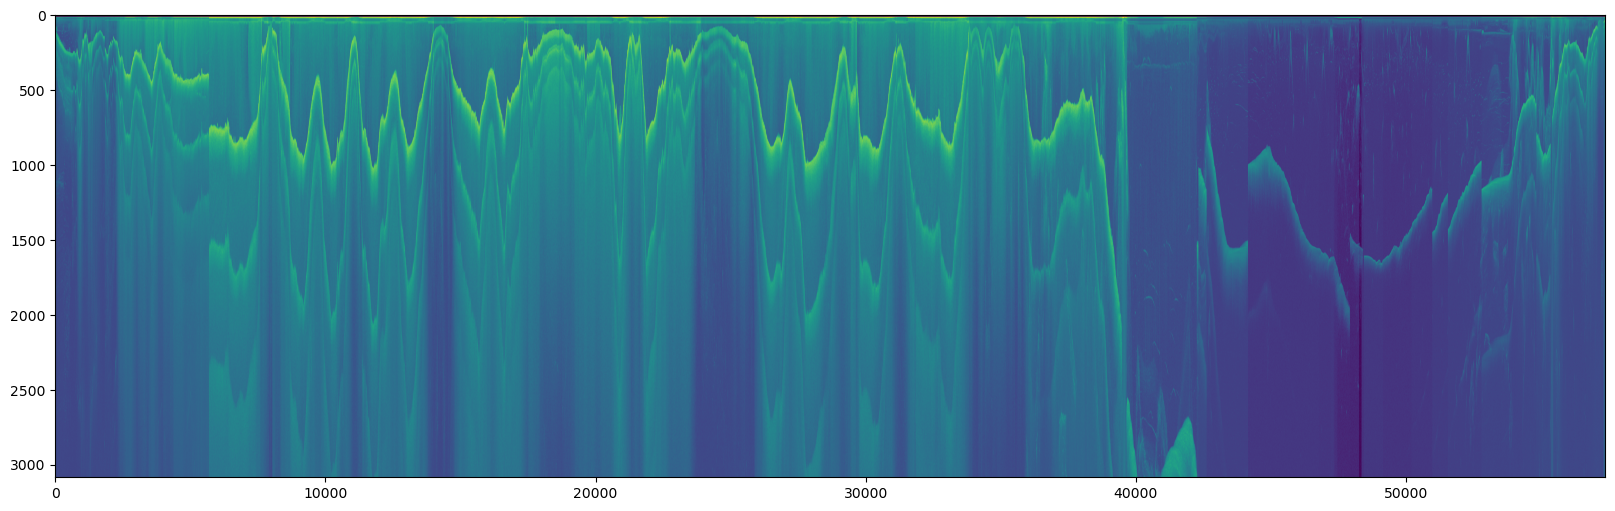

In [89]:
#Plot secondary channel
plt.figure(figsize=(20,6))
secondary = prim = sl3_2024_08_12__11_31_58.image("secondary")
plt.imshow(secondary.transpose(), aspect='auto')

#### Water column sonar imagery

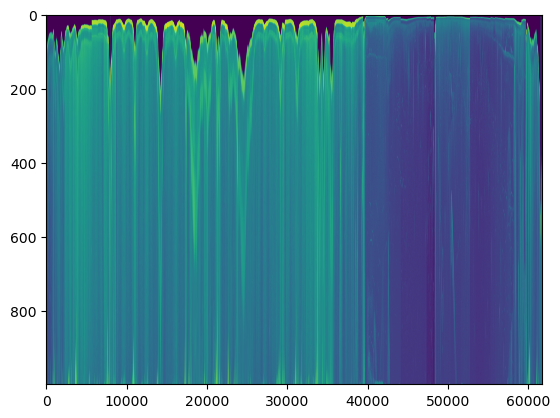

In [90]:
#Plot water column (surface to water_depth) from primary channel
#Individual frames are linearly interpolated of length 'pixels'
#plt.figure(figsize=(10,200))
primary_water = prim = sl3_2024_08_12__11_31_58.water("primary", pixels=1000)
plt.imshow(primary_water.transpose(), aspect='auto')

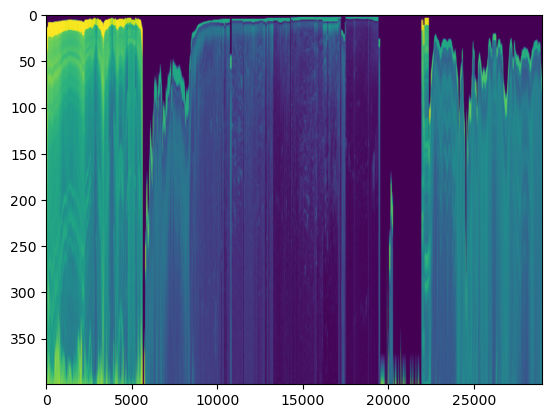

In [17]:
#Plot water column (surface to water_depth) from secondary channel
#Individual frames are linearly interpolated of length 'pixels'
#plt.figure(figsize=(10,200))
secondary_water = sl3.water("secondary", pixels=400)
plt.imshow(secondary_water.transpose(), aspect= 'auto')

#### Bottom sonar imagery

/tmp/ipykernel_23776/684916428.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(primary_bottom.transpose(), aspect= 'auto')
/tmp/ipykernel_23776/684916428.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, primary_bottom.shape[1])


(-0.05, 0.05)

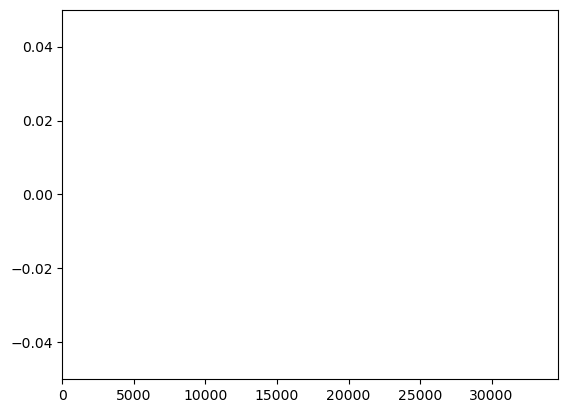

In [ ]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
#plt.figure(figsize=(5,200#))
primary_bottom = sl3.bottom("primary")
plt.imshow(primary_bottom.transpose(), aspect= 'auto')
plt.ylim(0, primary_bottom.shape[1])

/tmp/ipykernel_23776/811088002.py:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(secondary_bottom.transpose())


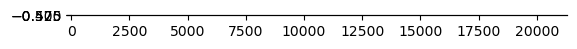

In [ ]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
secondary_bottom = sl3.bottom("secondary")
plt.imshow(secondary_bottom.transpose())